# In this code, we insert the average intensities per location on each channel to scatter values and check how much do they vary. CV is coefficient of variation

# Read dataframe and plot scatter plots 

Remeber to check dirpath where the csv files are located and the dir path where the scatter plot will be stored


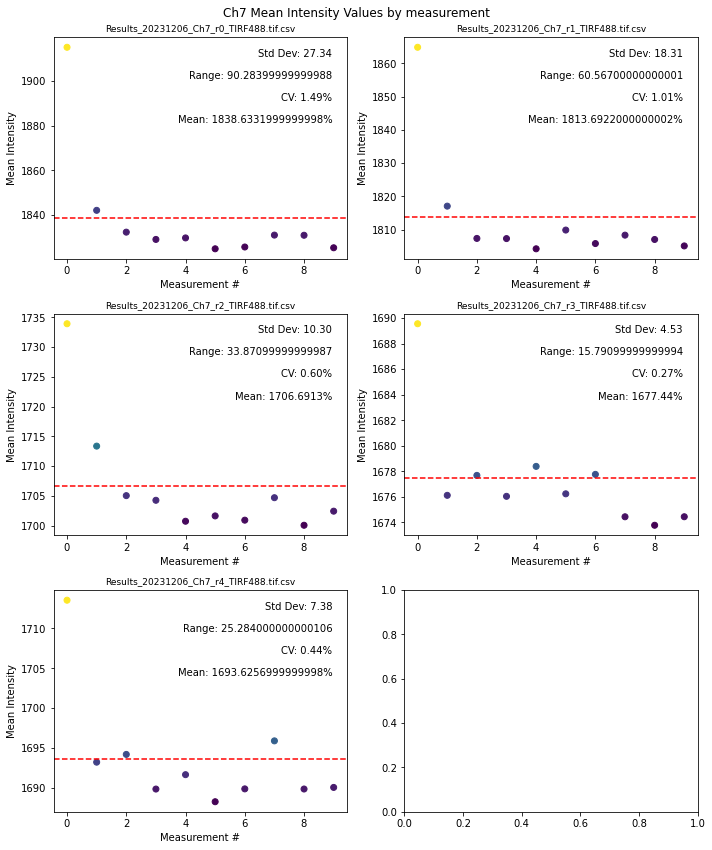

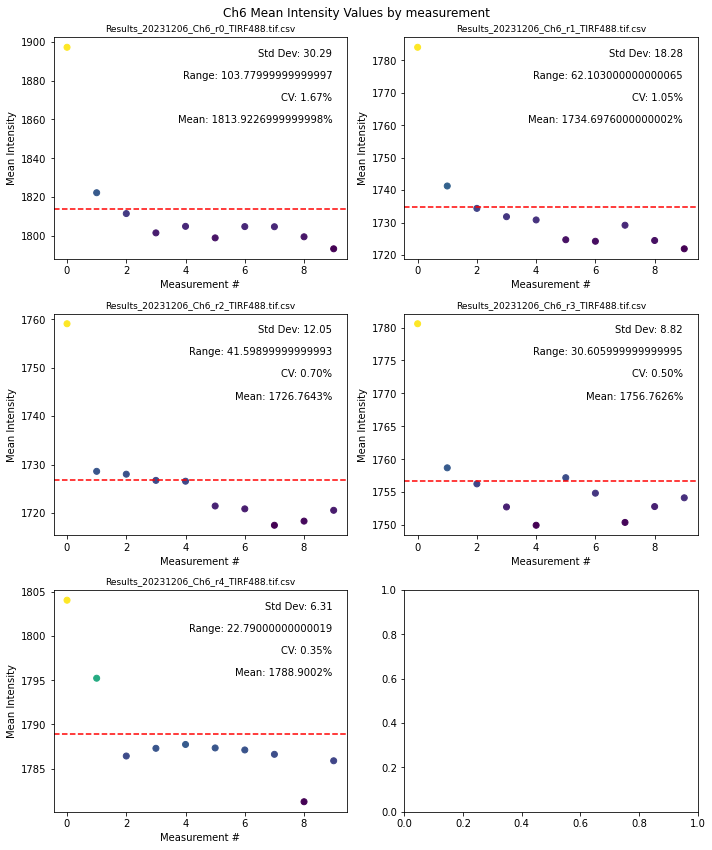

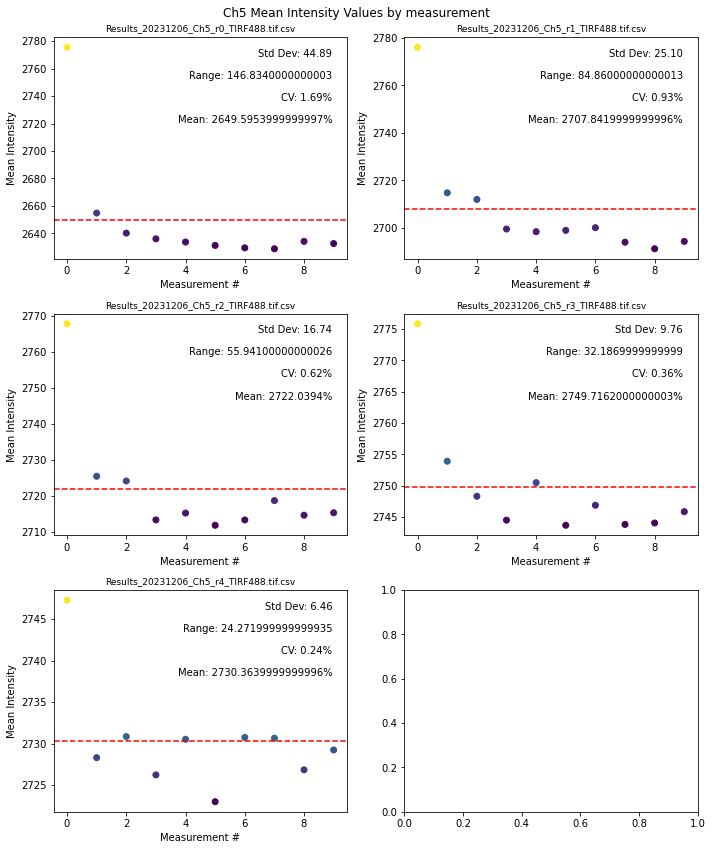

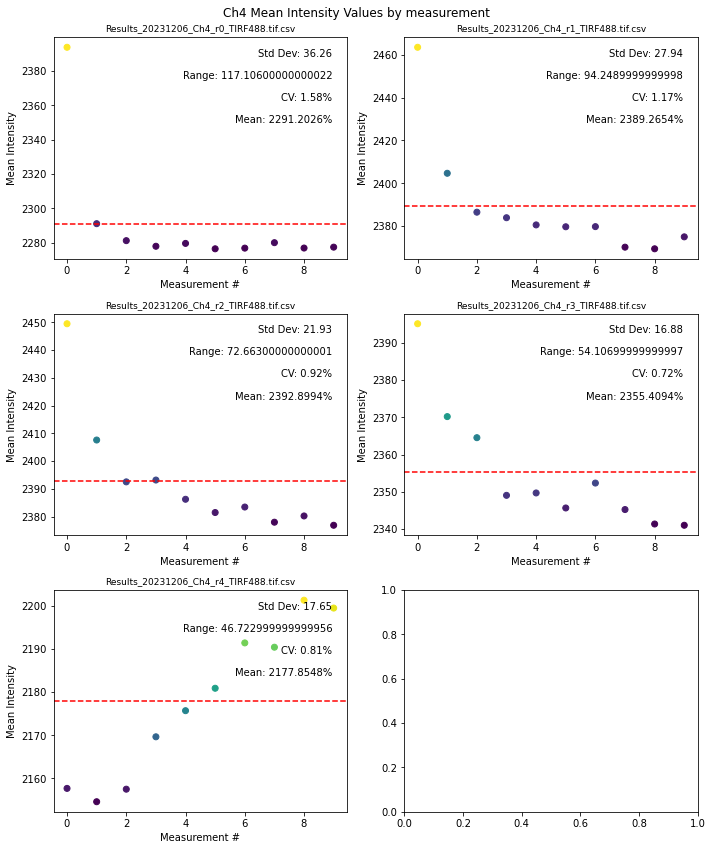

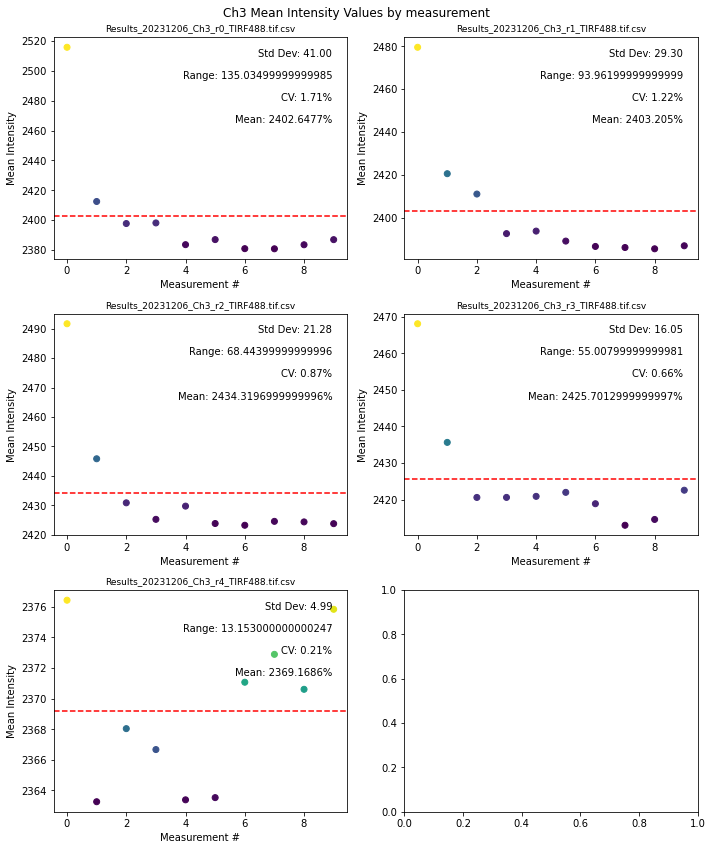

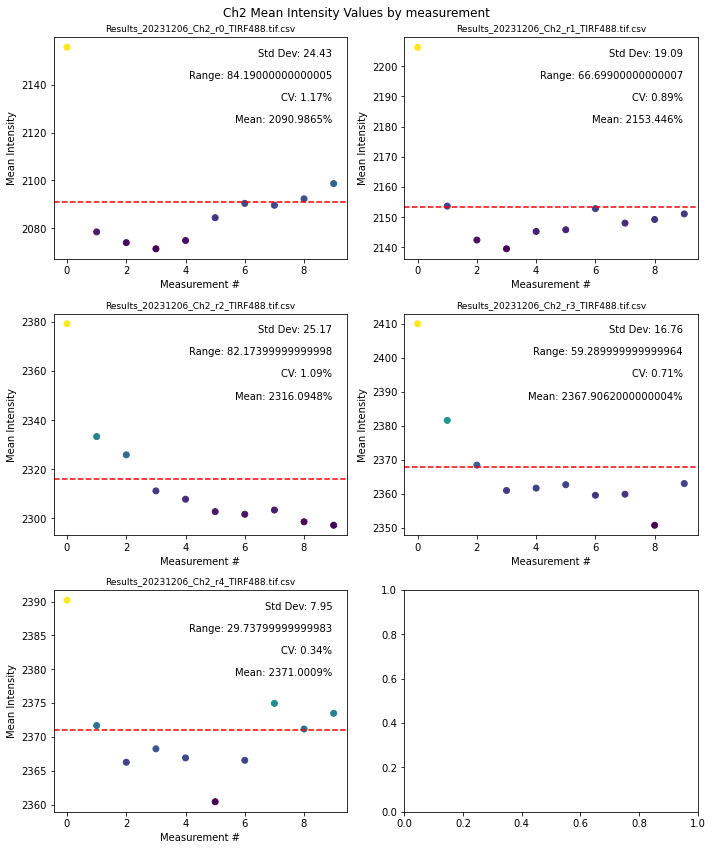

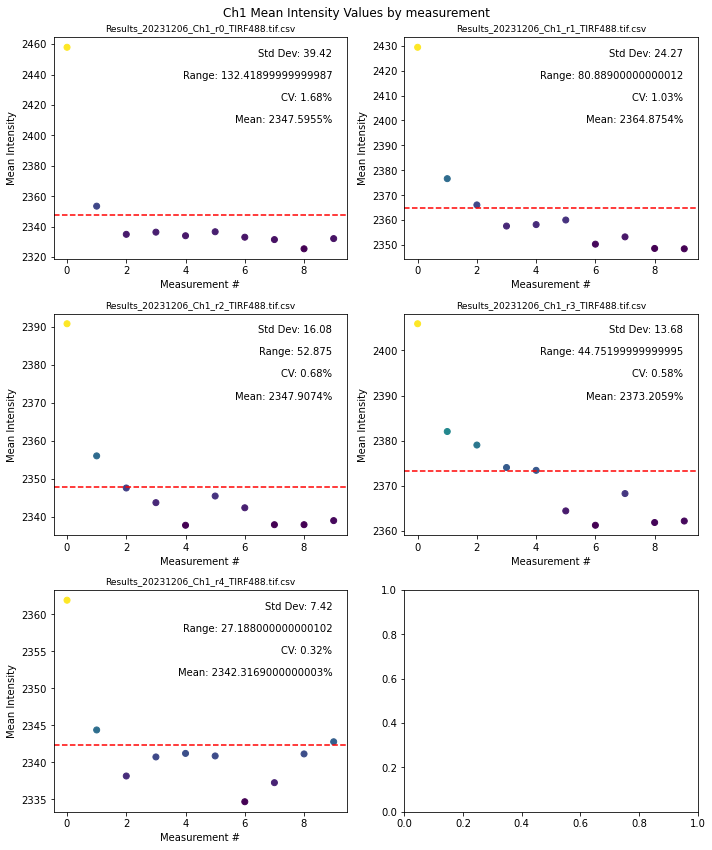

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np


# Read the CSV files, edit for each data set
csv_files = glob.glob('W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\20231206\\MDA\\Results_20231206_Ch*_r*_TIRF488.tif.csv')

# Group the CSV files by ChX value
csv_files_by_ch = {}
for file in csv_files:
    ch_number = int(file.split('_')[3][2:])  # Extract the ChX value from the file name
    #print(f'File: {file}, ChX: {ch_number}')
    if ch_number not in csv_files_by_ch:
        csv_files_by_ch[ch_number] = []
    csv_files_by_ch[ch_number].append(file)
    #for ch_number, files in csv_files_by_ch.items():
        #print(f'Ch {ch_number}, Files: {files}')  # Print the ChX value and the corresponding file paths
    #for i, file in enumerate(files):
       # print(f'Reading file: {file}')  # Print the file name
        #a = pd.read_csv(file)

# Loop through the CSV files for each ChX value and create a 3x2 matrix of scatter plots
for ch_number in np.arange(7, 0, -1):  # Iterate from Ch7 to Ch1
    if ch_number in csv_files_by_ch:
        files = csv_files_by_ch[ch_number][:5]  # Limit to the first 5 files for the matrix
        fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
        fig.suptitle(f'Ch{ch_number} Mean Intensity Values by measurement')
        for i, file in enumerate(files):
            df = pd.read_csv(file)
            row = i // 2
            col = i % 2
            axs[row, col].scatter(df.index, df['Mean(ROI)'], c=df['Mean(ROI)'], cmap='viridis')
            axs[row, col].set_xlabel('Measurement #')
            axs[row, col].set_ylabel('Mean Intensity')
            axs[row, col].set_title(os.path.basename(file), fontsize=9)
            plt.tight_layout()
            
            #Calculate mean value per plot
            mean = df['Mean(ROI)'].mean()
            axs[row, col].axhline(mean, color='r', linestyle='--')
            
            # Calculate the standard deviation, range, and coefficient of variation
            std = df['Mean(ROI)'].std()
            range = df['Mean(ROI)'].max() - df['Mean(ROI)'].min()
            cv = std / df['Mean(ROI)'].mean() * 100  # Express the coefficient of variation as a percentage
            
            # Display the values on the plot
            axs[row, col].text(0.95, 0.95, f'Std Dev: {std:.2f}', ha='right', va='top', transform=axs[row, col].transAxes)
            axs[row, col].text(0.95, 0.85, f'Range: {range}', ha='right', va='top', transform=axs[row, col].transAxes)
            axs[row, col].text(0.95, 0.75, f'CV: {cv:.2f}%', ha='right', va='top', transform=axs[row, col].transAxes)
            axs[row, col].text(0.95, 0.65, f'Mean: {mean}%', ha='right', va='top', transform=axs[row, col].transAxes)
            
            # Save the figure as a PNG image
            plt.tight_layout()
            save_dir = f'W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\20231206\\MDA\\ScatterPlots'
            os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
            plt.savefig(os.path.join(save_dir, f'Ch{ch_number}_scatter_plot.png'), dpi=300, bbox_inches='tight')
            #plt.close()
            
            
        plt.show()

# import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np


# Read the CSV files, edit for each data set
csv_files = glob.glob('W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\20231122\\MDA\\Results_20231122_Ch*_r*_TIRF488.tif.csv')

# Group the CSV files by ChX value
csv_files_by_ch = {}
for file in csv_files:
    ch_number = int(file.split('_')[3][2:])  # Extract the ChX value from the file name
    #print(f'File: {file}, ChX: {ch_number}')
    if ch_number not in csv_files_by_ch:
        csv_files_by_ch[ch_number] = []
    csv_files_by_ch[ch_number].append(file)
    #for ch_number, files in csv_files_by_ch.items():
        #print(f'Ch {ch_number}, Files: {files}')  # Print the ChX value and the corresponding file paths
    #for i, file in enumerate(files):
       # print(f'Reading file: {file}')  # Print the file name
        #a = pd.read_csv(file)

# Loop through the CSV files for each ChX value and create a 2x2 matrix of scatter plots
for ch_number in np.arange(7, 0, -1):  # Iterate from Ch7 to Ch1
    if ch_number in csv_files_by_ch:
        files = csv_files_by_ch[ch_number][:5]  # Limit to the first 16 files for the 4x4 matrix
        fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
        fig.suptitle(f'Ch{ch_number} Mean Intensity Values by measurement')
        for i, file in enumerate(files):
            df = pd.read_csv(file)
            row = i // 2
            col = i % 2
            axs[row, col].scatter(df.index, df['Mean(ROI)'], c=df['Mean(ROI)'], cmap='viridis')
            axs[row, col].set_xlabel('Measurement #')
            axs[row, col].set_ylabel('Mean Intensity')
            axs[row, col].set_title(os.path.basename(file), fontsize=9)
            plt.tight_layout()
            
            #Calculate mean value per plot
            mean = df['Mean(ROI)'].mean()
            axs[row, col].axhline(mean, color='r', linestyle='--')
            
            # Calculate the standard deviation, range, and coefficient of variation
            std = df['Mean(ROI)'].std()
            range = df['Mean(ROI)'].max() - df['Mean(ROI)'].min()
            cv = std / df['Mean(ROI)'].mean() * 100  # Express the coefficient of variation as a percentage
            
            # Display the values on the plot
            axs[row, col].text(0.95, 0.95, f'Std Dev: {std:.2f}', ha='right', va='top', transform=axs[row, col].transAxes)
            axs[row, col].text(0.95, 0.85, f'Range: {range}', ha='right', va='top', transform=axs[row, col].transAxes)
            axs[row, col].text(0.95, 0.75, f'CV: {cv:.2f}%', ha='right', va='top', transform=axs[row, col].transAxes)
            
        plt.show()


# In case you want to check the csv files entering as parameter to scatter plot

import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Read the CSV files
csv_files = glob.glob('W:\\staff-bulk\\tnw\\BN\\LL\\Shared\\Valentina\\Data_Analysis\\20231122\\MDA\\*.csv')

# Function to create a scatter plot for a single CSV file
def plot_csv_file(file):
    df = pd.read_csv(file)
    plt.scatter(df.index, df['Mean(ROI)'], c=df.index, cmap='viridis')  # Use the index as the x values
    plt.xlabel('Row Number')
    plt.ylabel('Mean(ROI)')
    plt.title(os.path.basename(file))  # Set the title of the scatter plot to the CSV file name
    
    # Calculate the standard deviation, range, interquartile range, and variance
    std = df['Mean(ROI)'].std()
    range = df['Mean(ROI)'].max() - df['Mean(ROI)'].min()
    iqr = df['Mean(ROI)'].quantile(0.75) - df['Mean(ROI)'].quantile(0.25)
    var = df['Mean(ROI)'].var()
    
    # Display the values on the plot
    plt.text(0.95, 0.95, f'Standard Deviation: {std:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f'Range: {range}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.75, f'Interquartile Range: {iqr}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.65, f'Variance: {var}', ha='right', va='top', transform=plt.gca().transAxes)
    
    plt.show()
    print(df.head())

# Loop through the CSV files and create a scatter plot for each one
for file in csv_files:
    plot_csv_file(file)